<a href="https://colab.research.google.com/github/Erikellerx/Projects_in_MLAI/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 AutoAugment

Reference: https://arxiv.org/pdf/1805.09501.pdf

Within image classification, there are various ways to improve testing accuracy, prevent overfitting, and reduce bias. Image augmentation is one of the method commonly used. However, augmentation methods are designed manually, requiring expert knowledge and time. The approach of AutoAugmentation is to utilize RL model to find the best augmentation policies for a specific dataset. This problem could be formulated as an MDP. This problem of finding the best augmentation policy can formulate as a discrete search problem. 



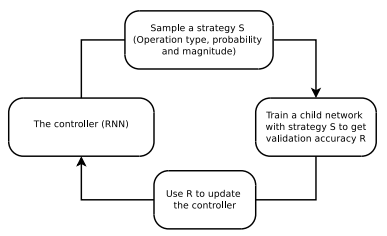


**State Space**: The State Space is a group of augmentation techniques requiring a controller to search for. These techniques include Cutout, SamplePairing, ShearX/Y, TranslateX/Y, Rotate, AutoContrast, Invert, Equalize, Solarize, Posterize, Contrast, Color, Brightness, Sharpnessm.(16 total) The paper discretize the range of magnitude into 10 values for search algorithm to search with. The probability of applying the operation is also discretized(11 states). 

**Action Space**: The action space is achieved by a search algorithm. The search algorithm will predict the action for next step. Essentially, there are two components: a controller, and a Proximal Policy Optimization algorithm. The controller will predict the action as strategy that will apply on the dataset as image augmentation. It will predict 5 sub-policy with each containing two actions/operations. 

**Transition model**: This paper create a child network that mainly measure the generalization of a child model. For each of a mini-batch, one of the five sub-policies will be applied to the training set. The child network will then evaluated on the validation set to measure the accuracy. 

**Rewards**: The accuracy reflected by child network will be used as the reward signal to train the controller RNN model. 

# Task 2 

Using reinforcement learning to identify high-risk states and treatments in healthcare

Reference: https://www.microsoft.com/en-us/research/blog/using-reinforcement-learning-to-identify-high-risk-states-and-treatments-in-healthcare/

As many concerns regarding the situation that medical facilities and clinicians will be overburden especially during pandemic, it is critical to make a quick dicision to provide the best possible treatment. These decision, in urgent situation, could lead to death or live of a patient. This situation could be potentially solved using reinforcement learning where each treatment could lead to a response from patient (reward) and patient's overall standing (states) could allow a controller to further recommand treatment (action) to that patient. Since healthcare is, at core, a sequential decision-making domain, this problem can be perfectly solved by reinforcement learning. 


In healthcare, clinicians base their treatment decisions on an understanding of a patient's health. Then they will observe how the patient responds to a specific treatment, and repeat. Similarly, in RL, agent will interprets the state and take action, which cause it to transit to a new state. This relationship is being shown in the figure below. 

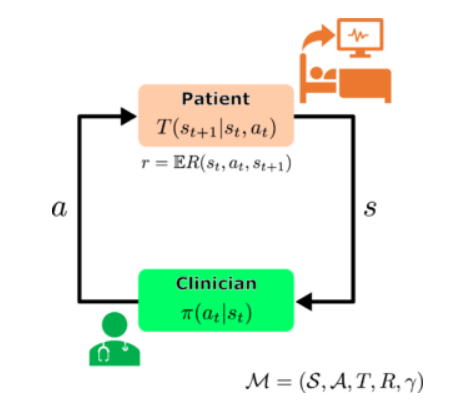

Github: https://github.com/microsoft/med-deadend

In this project, offline reinforcement learning is used since there is not possible to perform exploratory datta collection and experimentation in healthcare. They used the data that already exist. In their paper, instead of focusing what to do to maximize patient outcome, they proposed an idea of inverting this paradigm to avoiding high-rish treatments that cause patient to a critical point.(Dead-end Discovery-DeD) DeD will require exponentially less data and result to a more reliable outcome. 

To start with, they define two types of terminal states: patient recovery and patient death, which corresponds to positive outcomes and negative outcomes. BUilding on these two terminal states, they define medical dead ends as patient states from which all possible future trajectories will lead to the terminal state of the patient's death. It is significant to both avoid medical dead-ends and identify the probability of which treatment will lead to them. They also propose a rescue state where recovery is fully reachable. There should be at least one treatment with a prob of 1 that can lead rescue state to another rescue stage or to recovery. However, in most case, patient will be in somewhere in between which probability of recovery or death is not 0 and 1. 

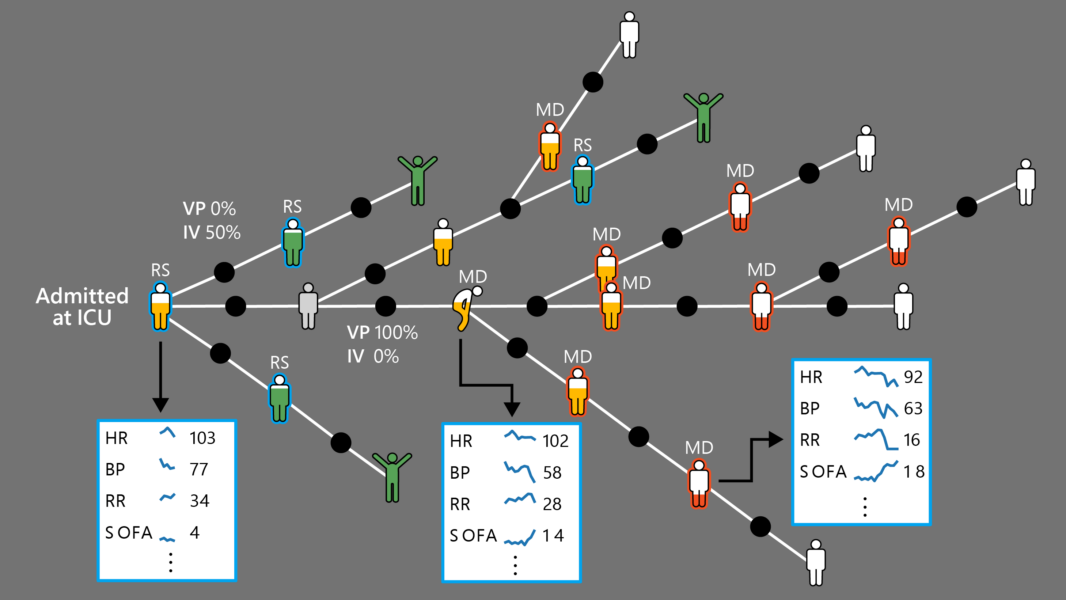

The reward signals for this task: 
1. -1 in the case of a negative outcome
2. +1 in the case of a positive outcome
3. 0 at all other transitions

They compute q value with no discounting and they found out that q values corresponds to the minimum probability of a future negative outcome if treatment a is selected at state s. Equivalently, 1 + q corresponds to the maxinum hope of a positive outcome. For treatment security, it is sufficient to abide by the maximum hope oof recovery. 

On top of that, they separate the outcome and learn the optimal value function of each outcome in isolation without discounting. In general, the pipeline are shown below. 

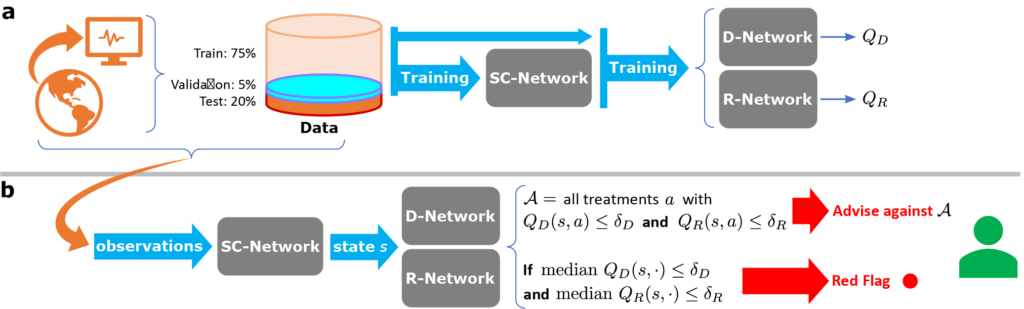